In [47]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [48]:
train_data_df = pd.read_csv("./digit-recognizer/train.csv")
train_data_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
def compute_fischer_score(dataframe1, dataframe2):
    arr1,arr2 =  dataframe1.values,dataframe2.values
   
    mu1, mu2 = np.mean(arr1, axis = 0),np.mean(arr2, axis = 0)
    variance1, variance2 = np.var(arr1, axis = 0),np.var(arr2, axis = 0)
    num1, num2 = np.size(arr1, axis = 0),np.size(arr2, axis = 0)
    
    between_class_var, within_class_var = np.square(mu1 - mu2),(num1 * variance1) + (num2 * variance2)
    fisher_score = between_class_var/within_class_var
    
    minmax_scaler = MinMaxScaler(feature_range = (0,1))
    minmax_scaler.fit(fisher_score[~np.isnan(fisher_score)].reshape(-1,1))
    fisher_score = minmax_scaler.transform(fisher_score.reshape(-1,1))

    return np.nan_to_num(fisher_score)

In [50]:
from itertools import combinations
score_list = []
labels = [0,1, 2, 3,4,5,6,7,8,9]
for comb in combinations(labels, 2):
    #combos.append(str(combo))
    #print("comb is:",comb)
    df1 = train_data_df[train_data_df["label"] == comb[0]].drop("label",axis=1)
    #print("df1 is:",df1.head(2))
    df2 = train_data_df[train_data_df["label"] == comb[1]].drop("label",axis=1)
    #print("df2 is:",df2.head(2))
    score_list.append(compute_fischer_score(df1, df2))

C:\Users\anuro\Softwares\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\anuro\Softwares\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\anuro\Softwares\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\anuro\Softwares\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\anuro\Softwares\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\anuro\Softwares\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
C:\Users\anuro\Softwares\lib\site-packages\ipykernel_launcher.py:9: RuntimeW

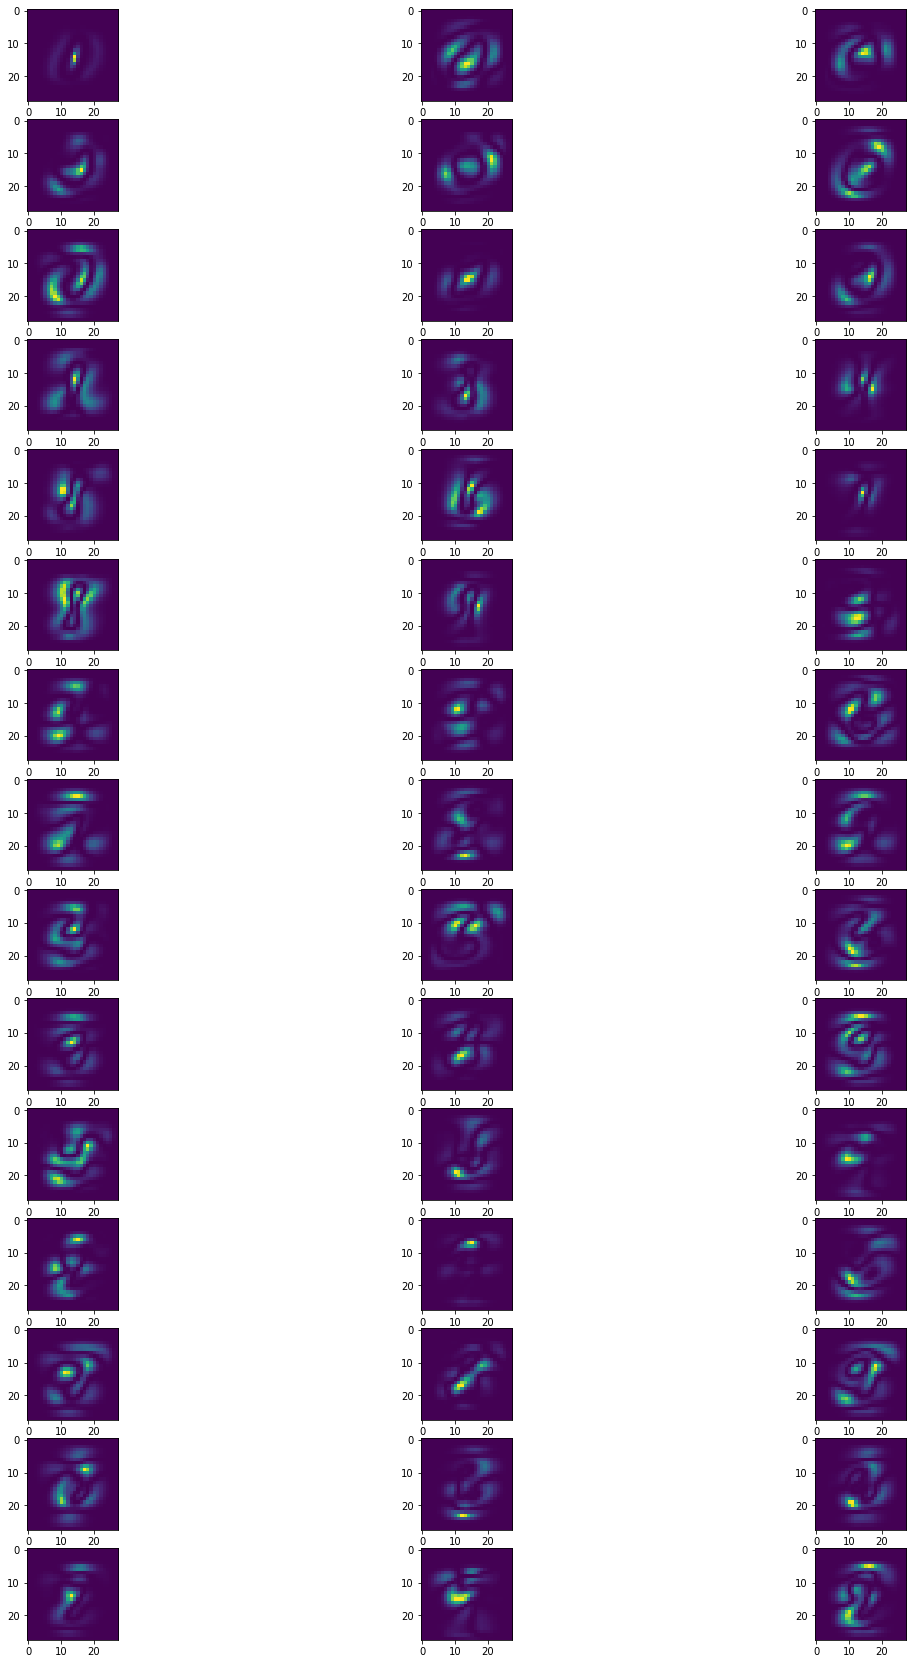

In [91]:
fig, ax = plt.subplots(nrows=15, ncols=3, figsize=(20, 30))
plot_ind = np.arange(45)+1

for score, ind in zip(score_list, plot_ind):
    plt.subplot(15,3,ind)
    #fig.set_figheight(50)
    #fig.set_figwidth(100)
    #plt.title(score)
    plt.imshow(score.reshape(28, 28))
    

#fig.subplots_adjust(hspace=0.1, wspace=0.1)
#plt.rcParams['figure.figsize'] = [4, 4]
#fig.set_size_inches(38.5, 10.5, forward=True)
plt.show()